# Cats vs. Dogs Image Classification with CNN

This notebook demonstrates the process of building a Convolutional Neural Network (CNN) using TensorFlow and Keras to classify images of cats and dogs. The dataset used is from a ZIP file containing training and validation images.

## Import Necessary Libraries

First, we need to import the necessary libraries for our project.


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from zipfile import ZipFile

## Extract Dataset

The dataset is contained within a ZIP file. We'll extract it to a specified directory.


In [27]:
zip_path = 'C:/Users/Dell/Desktop/BharatIntern/Cats&Dogs Classification/archive.zip'
extract_path = 'C:/Users/Dell/Desktop/BharatIntern/Cats&Dogs Classification'
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [28]:
base_dir = os.path.join(extract_path, 'dogs_vs_cats')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [29]:
if not os.path.exists(train_dir):
    print(f"Training directory {train_dir} does not exist.")
if not os.path.exists(test_dir):
    print(f"Test directory {test_dir} does not exist.")

## Load and Preprocess Data

We'll load the training and validation datasets using Keras' utility function and normalize the images.


In [74]:
# Load training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# Load validation dataset
validation_ds = keras.utils.image_dataset_from_directory(
    directory = test_dir,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [75]:
# Normalize the datasets
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## Build the CNN Model

We will create a Sequential CNN model with several convolutional, pooling, and dense layers.


In [32]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

We compile the model using the Adam optimizer and binary cross-entropy loss function, which is suitable for binary classification.


In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Train the Model

We train the model for 10 epochs and use the validation dataset to monitor performance.


In [35]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 783s 1s/step - accuracy: 0.5906 - loss: 0.6967 - val_accuracy: 0.7556 - val_loss: 0.5066
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 671s 1s/step - accuracy: 0.7500 - loss: 0.5102 - val_accuracy: 0.7822 - val_loss: 0.4559
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 660s 1s/step - accuracy: 0.7949 - loss: 0.4375 - val_accuracy: 0.8058 - val_loss: 0.4398
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 657s 1s/step - accuracy: 0.8459 - loss: 0.3451 - val_accuracy: 0.8014 - val_loss: 0.4687
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 754s 1s/step - accuracy: 0.9060 - loss: 0.2266 - val_accuracy: 0.7990 - val_loss: 0.6563
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 840s 1s/step - accuracy: 0.9498 - loss: 0.1366 - val_accuracy: 0.8004 - val_loss: 0.7874
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 756s 1s/step - accuracy: 0.9680 - loss: 0.0880 - val_accuracy: 0.7852 - val_loss: 0.8454
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 748s 1s/step - accuracy: 0.9743 - loss: 0.0752 - val_accu

In [46]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Print the accuracy scores
for epoch in range(len(train_acc)):
    print(f"Epoch {epoch + 1}: Train accuracy = {train_acc[epoch]}, Validation accuracy = {val_acc[epoch]}")

Epoch 1: Train accuracy = 0.6438000202178955, Validation accuracy = 0.7555999755859375
Epoch 2: Train accuracy = 0.7681000232696533, Validation accuracy = 0.7821999788284302
Epoch 3: Train accuracy = 0.8120999932289124, Validation accuracy = 0.8058000206947327
Epoch 4: Train accuracy = 0.8653500080108643, Validation accuracy = 0.8014000058174133
Epoch 5: Train accuracy = 0.919700026512146, Validation accuracy = 0.7990000247955322
Epoch 6: Train accuracy = 0.9555000066757202, Validation accuracy = 0.8004000186920166
Epoch 7: Train accuracy = 0.9699000120162964, Validation accuracy = 0.7851999998092651
Epoch 8: Train accuracy = 0.9775500297546387, Validation accuracy = 0.798799991607666
Epoch 9: Train accuracy = 0.983299970626831, Validation accuracy = 0.7889999747276306
Epoch 10: Train accuracy = 0.9857000112533569, Validation accuracy = 0.7752000093460083


## Visualize Training History

We plot the training and validation accuracy and loss to evaluate the model's performance and detect overfitting.


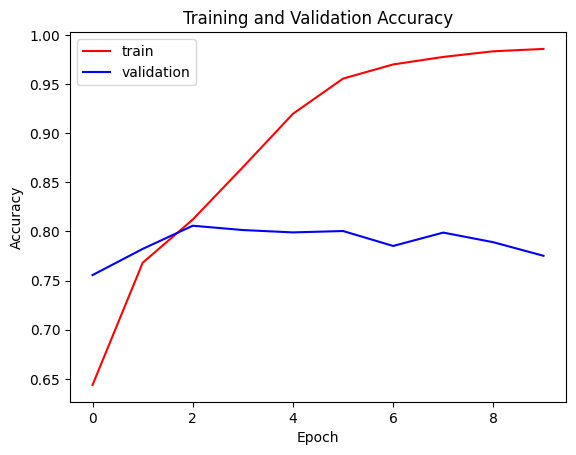

In [47]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## Ways to Reduce Overfitting

If the model is overfitting, here are some strategies to reduce overfitting:
- Add more data
- Data Augmentation
- Use L1/L2 Regularizers
- Apply Dropout
- Implement Batch Normalization
- Reduce model complexity


# Testing the Model with New Images

We will test the trained model with new images to evaluate its performance. We will use OpenCV to load the images, preprocess them, and then predict the class using our trained model.

## Import Necessary Libraries
We import the required libraries for image processing and visualization.


In [48]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

## Load and Preprocess Test Image

We load a new image of a dog and a cat, resize it to the required input size for the model, and preprocess it.


In [69]:
def predict_image(image_path, model, threshold=0.8):
    # Load the test image
    test_img = cv2.imread(image_path)
    
    # Display the image
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Test Image - {image_path}')
    plt.axis('off')
    plt.show()

    # Print the original shape of the image
    print("Original shape:", test_img.shape)

    # Resize the image to (256, 256)
    test_img = cv2.resize(test_img, (256, 256))

    # Reshape the image to match the input shape of the model
    test_input = test_img.reshape((1, 256, 256, 3))

    # Predict the class
    prediction = model.predict(test_input)

    # Print the prediction result with a confidence threshold
    if prediction[0][0] > threshold:
        print("Prediction: Dog")
    elif prediction[0][0] < (1 - threshold):
        print("Prediction: Cat")

## Predict the Class of the Dog Image

We use the trained model to predict the class of the test image.


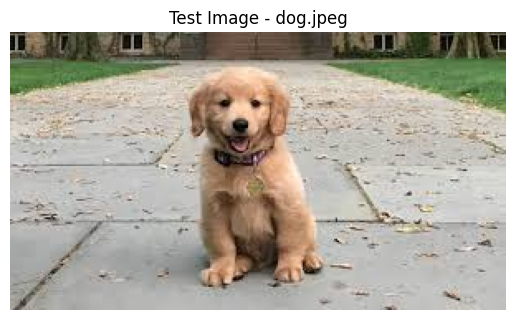

Original shape: (168, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: Dog


In [70]:
predict_image('dog.jpeg', model)


## Predict the Class of the Cat Image

We use the trained model to predict the class of the test image.


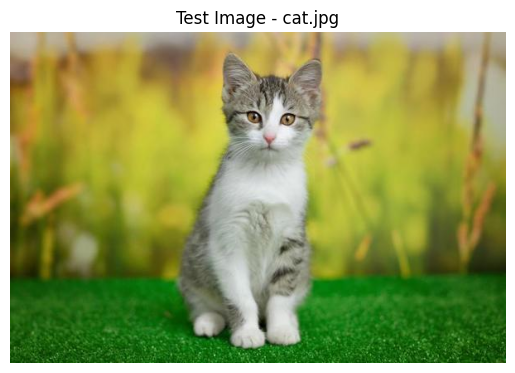

Original shape: (400, 599, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction: Cat


In [73]:
predict_image('cat.jpg', model)